In [1]:
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(data_dir, output="outputData3",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values

# Split val/test with a fixed number of items, e.g. `(100, 100)`, for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# Set 3 values, e.g. `(300, 100, 100)`, to limit the number of training values.

In [16]:
data_dir = "MangoData_Disease"
output_dir = "outputData2"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")
val_dir = os.path.join(output_dir, "val")

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42, # set a random seed for reproducibility
    interpolation='bicubic' # use bicubic interpolation for image resizing
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    interpolation='bicubic' # use bicubic interpolation for image resizing
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    interpolation='bicubic' # use bicubic interpolation for image resizing
)


Found 2400 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


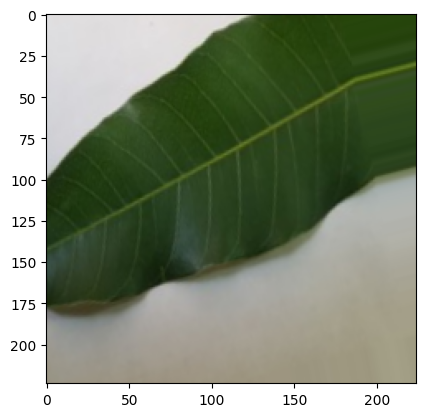

In [4]:
import matplotlib.pyplot as plt

# Get a batch of images and their labels
x_batch, y_batch = next(train_generator)

# Select an image from the batch (index 0)
img = x_batch[10]

# Display the image
plt.imshow(img)
plt.show()


In [114]:
# Set the number of classes in your dataset
num_classes = len(train_generator.class_indices)

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Dropout(0.5),
    layers.Flatten(),   
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_60 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_61 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                     

In [37]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    metrics=['accuracy']
)

# Train the model
epochs=12
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/12
75/75 [==============================] - 105s 1s/step - loss: 2.8851 - accuracy: 0.1412 - val_loss: 26.5767 - val_accuracy: 0.1200
Epoch 2/12
75/75 [==============================] - 117s 2s/step - loss: 2.0803 - accuracy: 0.1154 - val_loss: 5.9667 - val_accuracy: 0.1650
Epoch 3/12
75/75 [==============================] - 107s 1s/step - loss: 2.0802 - accuracy: 0.1104 - val_loss: 4.2114 - val_accuracy: 0.1663
Epoch 4/12
75/75 [==============================] - 102s 1s/step - loss: 2.0814 - accuracy: 0.1187 - val_loss: 10.5712 - val_accuracy: 0.0825
Epoch 5/12
75/75 [==============================] - 101s 1s/step - loss: 2.0802 - accuracy: 0.1142 - val_loss: 3.5600 - val_accuracy: 0.1275
Epoch 6/12
75/75 [==============================] - 101s 1s/step - loss: 2.0801 - accuracy: 0.1117 - val_loss: 2.1564 - val_accuracy: 0.1262
Epoch 7/12
75/75 [==============================] - 107s 1s/step - loss: 2.0801 - accuracy: 0.1175 - val_loss: 2.0826 - val_accuracy: 0.1250
Epoch 8/12


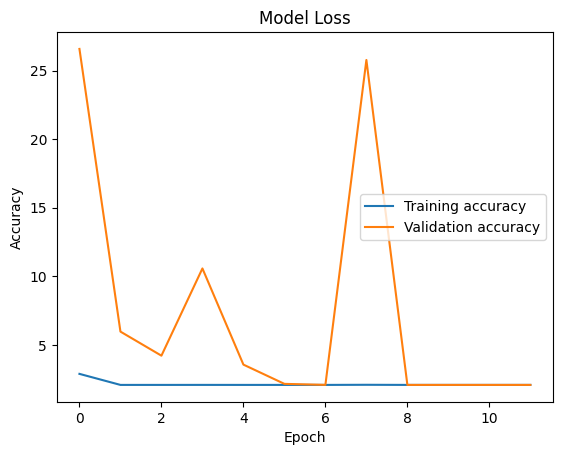

In [41]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training accuracy')
plt.plot(history.history['val_loss'], label='Validation accuracy')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
# Set the number of classes in your dataset
num_classes = len(train_generator.class_indices)

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),


    layers.Flatten(),   
    layers.Dense(num_classes, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_42 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_43 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_44 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_44 (Bat  (None, 224, 224, 32)   

In [37]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.003),
    metrics=['accuracy']
)

# Train the model
epochs=12
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/12
75/75 [==============================] - 194s 3s/step - loss: 4.5761 - accuracy: 0.1163 - val_loss: 77.3176 - val_accuracy: 0.1325
Epoch 2/12
75/75 [==============================] - 196s 3s/step - loss: 2.0800 - accuracy: 0.1154 - val_loss: 125.7866 - val_accuracy: 0.1250
Epoch 3/12
75/75 [==============================] - 203s 3s/step - loss: 2.0799 - accuracy: 0.1129 - val_loss: 84.1004 - val_accuracy: 0.1412
Epoch 4/12
75/75 [==============================] - 196s 3s/step - loss: 2.0800 - accuracy: 0.1142 - val_loss: 35.4156 - val_accuracy: 0.1637
Epoch 5/12
75/75 [==============================] - 201s 3s/step - loss: 2.0798 - accuracy: 0.1163 - val_loss: 9.6469 - val_accuracy: 0.0775
Epoch 6/12
75/75 [==============================] - 212s 3s/step - loss: 2.0800 - accuracy: 0.1083 - val_loss: 3.1893 - val_accuracy: 0.1150
Epoch 7/12
75/75 [==============================] - 213s 3s/step - loss: 2.0800 - accuracy: 0.1067 - val_loss: 2.2629 - val_accuracy: 0.1250
Epoch 8/

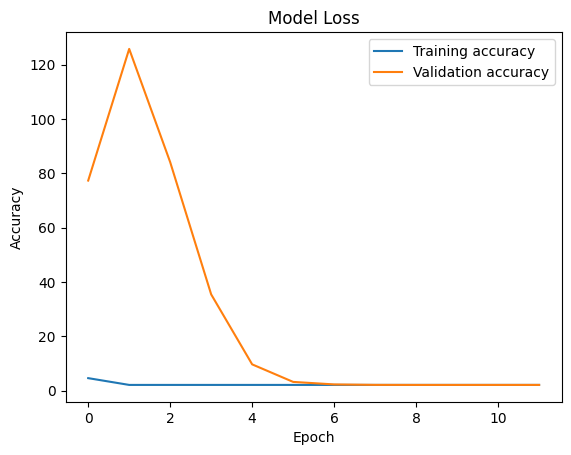

In [38]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training accuracy')
plt.plot(history.history['val_loss'], label='Validation accuracy')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [64]:
# Set the number of classes in your dataset
num_classes = len(train_generator.class_indices)

# Define the model
model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3,3),
    
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(3,3),
    

    layers.Flatten(),   
    layers.Dense(num_classes, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                        

In [65]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
epochs=20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/20
75/75 [==============================] - 80s 1s/step - loss: 2.1775 - accuracy: 0.1233 - val_loss: 2.1656 - val_accuracy: 0.1725
Epoch 2/20
75/75 [==============================] - 77s 1s/step - loss: 2.0799 - accuracy: 0.1067 - val_loss: 5.7085 - val_accuracy: 0.1250
Epoch 3/20
75/75 [==============================] - 75s 1s/step - loss: 2.0814 - accuracy: 0.1167 - val_loss: 5.9481 - val_accuracy: 0.1300
Epoch 4/20
75/75 [==============================] - 78s 1s/step - loss: 2.0790 - accuracy: 0.1254 - val_loss: 3.5591 - val_accuracy: 0.1587
Epoch 5/20
75/75 [==============================] - 77s 1s/step - loss: 2.0887 - accuracy: 0.1225 - val_loss: 2.3585 - val_accuracy: 0.1937
Epoch 6/20
75/75 [==============================] - 77s 1s/step - loss: 2.0797 - accuracy: 0.1192 - val_loss: 2.0571 - val_accuracy: 0.1825
Epoch 7/20
75/75 [==============================] - 76s 1s/step - loss: 2.0797 - accuracy: 0.1121 - val_loss: 2.0786 - val_accuracy: 0.1312
Epoch 8/20
75/75 [==

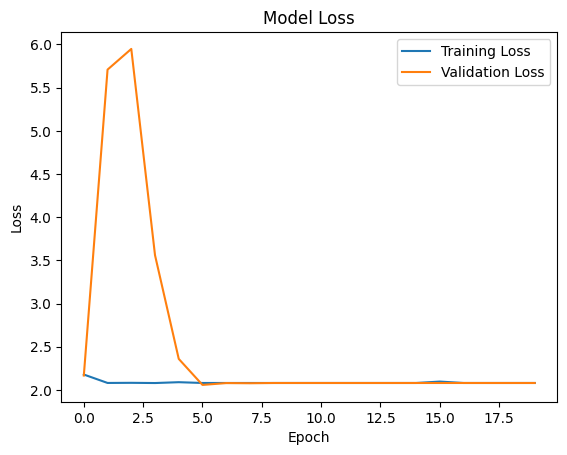

In [66]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Load the data using the ImageDataGenerator as before

# Extract the features and labels from the training set
train_features, train_labels = next(train_generator)

# Reshape the features to a 2D array for input to the KNN algorithm
train_features = train_features.reshape(train_features.shape[0], -1)

# Create the KNN classifier and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_features, train_labels)

# Extract the features and labels from the validation set
val_features, val_labels = next(val_generator)

# Reshape the features to a 2D array for input to the KNN algorithm
val_features = val_features.reshape(val_features.shape[0], -1)

# Evaluate the KNN classifier on the validation set
val_acc = knn.score(val_features, val_labels)

# Print the validation accuracy
print("Validation accuracy:", val_acc)

Validation accuracy: 0.53125


In [103]:
from sklearn.neighbors import KNeighborsClassifier

train_features, train_labels = next(train_generator)
train_features = train_features.reshape(train_features.shape[0], -1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
val_features, val_labels = next(val_generator)
val_features = val_features.reshape(val_features.shape[0], -1)

val_acc = knn.score(val_features, val_labels)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.3125


In [65]:
from sklearn.neighbors import KNeighborsClassifier


train_features, train_labels = next(train_generator)
train_features = train_features.reshape(train_features.shape[0], -1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, train_labels)
val_features, val_labels = next(val_generator)
val_features = val_features.reshape(val_features.shape[0], -1)
val_acc = knn.score(val_features, val_labels)
print("Validation accuracy:", val_acc)

Validation accuracy: 0.28125


In [63]:
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

import numpy as np
train_images = train_images.reshape(train_images.shape[0], -1)
val_images = val_images.reshape(val_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

train_labels = np.argmax(train_labels, axis=1)
val_labels = np.argmax(val_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)


from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(train_images, train_labels)


val_acc = rf_clf.score(val_images, val_labels)
test_acc = rf_clf.score(test_images, test_labels)

print("Validation accuracy:", val_acc)


Validation accuracy: 0.84375


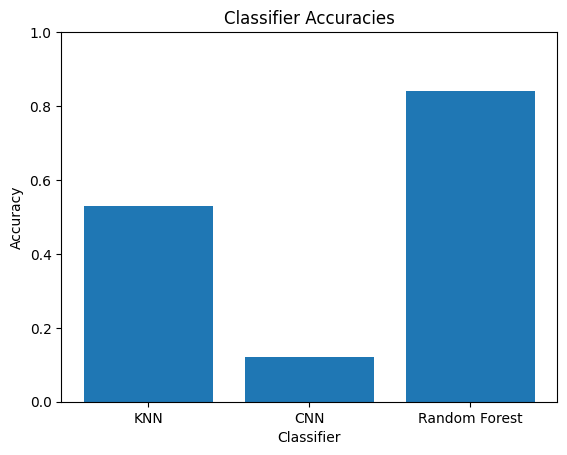

In [68]:
import matplotlib.pyplot as plt

classifiers = ['KNN', 'CNN', 'Random Forest']
accuracies = [0.53, 0.12, 0.84]

plt.bar(classifiers, accuracies)
plt.title('Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.show()